# HW 4 Template

This code may (or may not!) be helpful in your Fourth assignment.  Feel free to use it (or not).

Minor edits.

## Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

This section provides some initialization commands, which can simply be copied for assignments.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# We need to import key libraries that we're going to use.  
# For now this is just numpy, which is our linear algebra library
import numpy as np

Setting the random seed for code reproducibility.

In [2]:
# to make this notebook's output stable across runs, we are going to see the random seed
np.random.seed(42)

Note that we have to reset the random seed _every_ time we run an algorithm if we want the same results!

We also want to set up a plotting environment and make it look pretty.  For those of you familiar with matlab, we will be using matplotlib which is fairly close in syntax and feel.  It's not too far off from R either.

In [3]:
# To plot pretty figures
import matplotlib.pyplot as plt
%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

These commands will help us save figures; not going to go through them so much.

In [4]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_SAVE_DIR = "hw4"

In [5]:
# makes the directory if it doesn't exist.
import os
if not (os.path.isdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)):
    print('Figure directory didn\'t exist, creating now.')
    os.mkdir(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR)
else:
    print('Figure directory exists.') 

Figure directory exists.


In [6]:
# a simple defined helper function.
def savepdf(fig,name):
    fig.savefig(PROJECT_ROOT_DIR+'/'+PROJECT_SAVE_DIR+'/'+name+'.pdf')

## Problem 1

In [7]:
import pandas as pd
from sklearn import metrics

In [8]:
ydf=pd.read_csv('hw3/hw3_problem_5_y_blind.csv')
y_blind=np.array(ydf.values[:,1],dtype=np.float64)

In [9]:
print(y_blind.shape)

(124,)


In [10]:
ydf2=pd.read_csv('answers/hw3_problem_5_y_blind_predicted.csv')
y_blind2=np.array(ydf2.values[:,1],dtype=np.float64)
print(y_blind2.shape)

fpr, tpr, _ = metrics.roc_curve(y_blind, y_blind2)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

(124,)
0.733151183970856


## Problem 2

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn import ensemble,model_selection,svm,decomposition,pipeline
cancer = load_breast_cancer()

In [34]:
def sample_data(n_used=25):
    # Randomize the order to help get better estimates (there's some structure in the data)
    N=len(cancer.target)
    np.random.seed(42) # reproducibility
    perm=np.random.permutation(N)
    # limiting data size to emphasize the point
    X=cancer.data[perm,:]
    y=cancer.target[perm]
#     X_holdout=cancer.data[n_used:,:]
#     y_holdout=cancer.target[n_used:]
    X=X[:n_used,:]
    y=y[:n_used]
    return X,y

In [35]:
# reuse lecture_18 permutation code
from sklearn import tree

cv=model_selection.KFold(n_splits=5,shuffle=True,random_state=42)

# decision tree
clf=tree.DecisionTreeClassifier()
param_grid={'min_samples_split':[2,5],'max_depth':[1,2,3],'min_samples_leaf':[1,3,5]}
gs=model_selection.GridSearchCV(clf,param_grid,scoring='roc_auc',cv=cv)

# svm
# pca=decomposition.PCA()
# clf=svm.SVC(kernel='rbf')
# pipe=pipeline.Pipeline([('pca',pca),('clf',clf)])
# param_grid={'pca__n_components':np.arange(2,7),'clf__C':np.logspace(-2,0,5),'clf__gamma':np.logspace(-2,0,5)}
# gs=model_selection.GridSearchCV(pipe,param_grid,scoring='roc_auc',cv=cv)

In [36]:
N = np.array([20,50,100,200,400])

scores_mean = np.empty(N.shape)
scores_std = np.empty(N.shape)

idx = 0
for n in N:
    # sample the data
    X, y = sample_data(n)
    scores = []
    for repeat in range(0, 10):
        try:
            gs.fit(X, np.random.permutation(y))
            scores.append(gs.best_score_)
        except ValueError as err:
            print(err)
    scores_mean[idx] = np.mean(scores)
    scores_std[idx] = np.std(scores)
    idx += 1


Only one class present in y_true. ROC AUC score is not defined in that case.
Only one class present in y_true. ROC AUC score is not defined in that case.


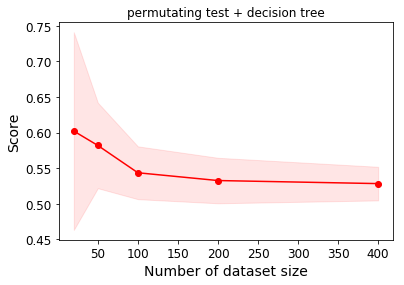

In [37]:
plt.figure()
plt.title('permutating test + decision tree')
plt.xlabel('Number of dataset size')
plt.ylabel('Score')

plt.fill_between(N, scores_mean-scores_std, scores_mean+scores_std, alpha=0.1, color="r")
plt.plot(N, scores_mean, 'o-', color='r')    
plt.show()

In [44]:
# increase search space
cv=model_selection.KFold(n_splits=5,shuffle=True,random_state=42)

# decision tree
clf=tree.DecisionTreeClassifier()
param_grid={'min_samples_split':[2,5],'max_depth':[1,2,3,4,5],'min_samples_leaf':[1,3,5]}
gs=model_selection.GridSearchCV(clf,param_grid,scoring='roc_auc',cv=cv)

# svm
# pca=decomposition.PCA()
# clf=svm.SVC(kernel='rbf')
# pipe=pipeline.Pipeline([('pca',pca),('clf',clf)])
# param_grid={'pca__n_components':np.arange(2,12),'clf__C':np.logspace(-2,0,8),'clf__gamma':np.logspace(-2,0,8)}
# gs=model_selection.GridSearchCV(pipe,param_grid,scoring='roc_auc',cv=cv)

In [45]:
N = np.array([20,50,100,200,400])

scores_mean = np.empty(N.shape)
scores_std = np.empty(N.shape)

idx = 0
for n in N:
    # sample the data
    X, y = sample_data(n)
    scores = []
    for repeat in range(0, 10):
        try:
            gs.fit(X, np.random.permutation(y))
            scores.append(gs.best_score_)
        except ValueError as err:
            print(err)
    scores_mean[idx] = np.mean(scores)
    scores_std[idx] = np.std(scores)
    idx += 1

Only one class present in y_true. ROC AUC score is not defined in that case.
Only one class present in y_true. ROC AUC score is not defined in that case.
Only one class present in y_true. ROC AUC score is not defined in that case.
Only one class present in y_true. ROC AUC score is not defined in that case.
Only one class present in y_true. ROC AUC score is not defined in that case.


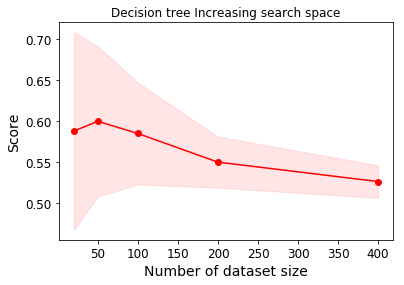

In [46]:
plt.figure()
plt.title('Decision tree Increasing search space')
plt.xlabel('Number of dataset size')
plt.ylabel('Score')
plt.fill_between(N, scores_mean-scores_std, scores_mean+scores_std, alpha=0.1, color="r")
plt.plot(N, scores_mean, 'o-', color='r')    
plt.show()

## Problem 3

In [47]:
import pandas as pd
from sklearn import linear_model, metrics, neighbors, model_selection, preprocessing, pipeline

In [48]:
co2_df=pd.read_csv('./data/co2_weekly_mlo.txt',header=48,delim_whitespace=True)
co2_df[:5]
# some quick_data_cleaning
# replace missing numbers with NaNs for clarity
missing=co2_df['ppm']<0
co2_df['ppm'].values[missing]=np.NaN
times=co2_df['decimal']
co2=co2_df['ppm']
# We have some missing data, so we'll do a quick interpolation.  We'll come back to this.
from scipy.interpolate import interp1d
not_observed=np.isnan(co2)
interpolator=interp1d(times[~not_observed],co2[~not_observed],kind='cubic')
co2_interpolated=interpolator(times)

In [49]:
print(times.head())

0    1974.3795
1    1974.3986
2    1974.4178
3    1974.4370
4    1974.4562
Name: decimal, dtype: float64


In [50]:
co2_df.head()

,yr,mon,day,decimal,ppm,"#days,",1_yr_ago,10_yr_ago,since_1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [51]:
print(co2_interpolated)

[333.34 332.95 332.32 ... 408.92 409.84 408.72]


Text(0, 0.5, 'co2, ppm')

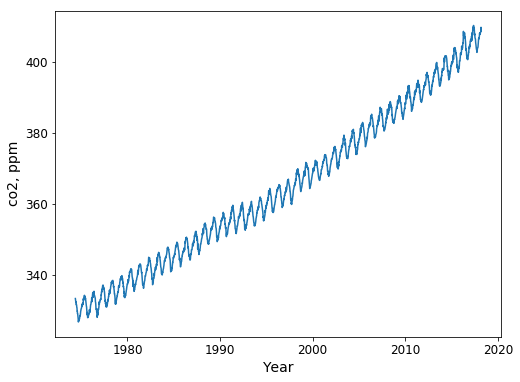

In [52]:
fig=plt.figure(figsize=[8,6])
plt.plot(times, co2_interpolated)
plt.xlabel('Year')
plt.ylabel('co2, ppm')

In [53]:
KFold=model_selection.KFold(n_splits=4,random_state=10,shuffle=True)

In [54]:
# a helper function for time series validation
# @return MSE, STD_ERROR
def time_series_valid(X, y, model):
    normalizer=preprocessing.StandardScaler()
    pipe=pipeline.Pipeline([('norm',normalizer),('model',model)])
    TSS=model_selection.TimeSeriesSplit(n_splits=10)
    scores=[]
    for train_ndx, valid_ndx in TSS.split(X,y):
        valid_ndx_adjusted=valid_ndx
        pipe.fit(X[train_ndx],y[train_ndx])
        score=(metrics.mean_squared_error\
          (y[valid_ndx_adjusted],pipe.predict(X[valid_ndx_adjusted])))
        scores.append(score)
    # print('Average MSE of {0} with a standard error of {1}'.format(np.mean(scores),np.std(scores)/np.sqrt(KFold.n_splits)))
    explained_variance=1-np.mean(scores)/metrics.mean_squared_error(np.mean(y).repeat(y.shape),y)
    return np.mean(scores), np.std(scores)/np.sqrt(KFold.n_splits), explained_variance

In [55]:
# (a) A linear regression model to forecast one step ahead on the raw data
lin_reg=linear_model.LinearRegression()
max_lags=100
lin_scores_raw=np.zeros([max_lags-1])
for n_lag in range(1, max_lags):
    # Construct our new 'X' matrix
    n_max=len(co2_interpolated)
    X=np.zeros([n_max-n_lag, n_lag])
    for i in range(0, n_max-n_lag):
        X[i]=co2_interpolated[i:i+n_lag]
    y=co2_interpolated[n_lag:]
    mse, std_err, explained_variance = time_series_valid(X, y, lin_reg)
    lin_scores_raw[n_lag-1]=mse

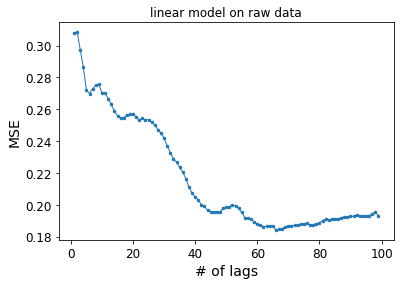

In [56]:
# (a) plot the result
fig=plt.figure()
plt.plot(range(1, max_lags),lin_scores_raw,'.-',lw=1,ms=5)
plt.xlabel('# of lags')
plt.ylabel('MSE')
plt.title('linear model on raw data')
plt.show()

In [57]:
idx = np.argmin(lin_scores_raw)
print("the best number of lags is {}, with MSE at {}".format(idx+1, lin_scores_raw[idx]))

the best number of lags is 66, with MSE at 0.18417251601588105


In [58]:
# (b) A k-Nearest Neighbor model to forecast one step ahead on the raw data
N = 20
n_max=len(co2_interpolated)
n_lag = 2
knn_scores_raw=np.zeros([N-1])
for n in range(1, N):
    knn=neighbors.KNeighborsRegressor(n_neighbors=n)
    # Construct our new 'X' matrix
    X=np.zeros([n_max-n_lag, n_lag])
    for i in range(0,n_max-n_lag):
        X[i]=co2_interpolated[i:i+n_lag]
    y=co2_interpolated[n_lag:]
    mse, std_err, explained_variance = time_series_valid(X, y, knn)
    knn_scores_raw[n-1]=mse

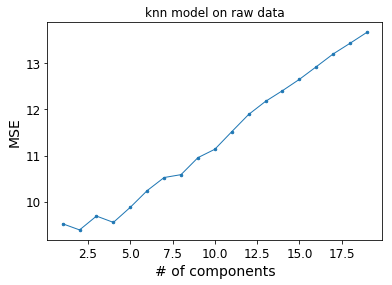

In [60]:
# (a) plot the result
fig=plt.figure()
plt.plot(range(1, N),knn_scores_raw,'.-',lw=1,ms=5)
plt.xlabel('# of components')
plt.ylabel('MSE')
plt.title('knn model on raw data')
plt.show()

In [61]:
# get the optimal number of neighbors
idx = np.argmin(knn_scores_raw)
print("the optimal number of neibors is {}, with MSE at {}".format(idx+1, knn_scores_raw[idx]))

the optimal number of neibors is 2, with MSE at 9.386560797996758


In [62]:
from scipy.signal import detrend
co2_detrended=detrend(co2_interpolated)

Text(0, 0.5, 'Detrended co2, ppm')

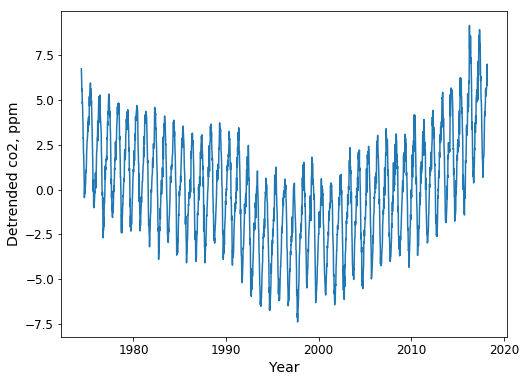

In [63]:
fig=plt.figure(figsize=[8,6])
plt.plot(times,co2_detrended)
plt.xlabel('Year')
plt.ylabel('Detrended co2, ppm')

In [64]:
# (d) A linear regression model to forecast one step ahead on the detrended data
lin_reg=linear_model.LinearRegression()
max_lags= 100
lin_scores_detrended=np.zeros([max_lags-1])

for n_lag in range(1,max_lags):
    # Construct our new 'X' matrix
    n_max=len(co2_detrended)
    X=np.zeros([n_max-n_lag, n_lag])
    for i in range(0,n_max-n_lag):
        X[i]=co2_detrended[i:i+n_lag]
    y=co2_detrended[n_lag:]
    mse, std_err, explained_variance = time_series_valid(X, y, lin_reg)
    lin_scores_detrended[n_lag-1]=mse

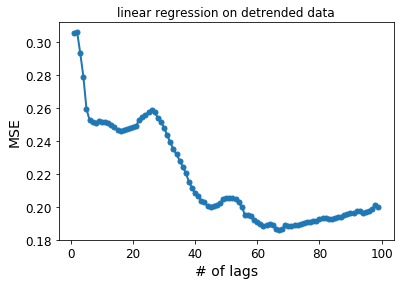

In [73]:
# (a) plot the result
fig=plt.figure()
plt.plot(range(1,max_lags),lin_scores_detrended,'.-',lw=2,ms=10)
plt.xlabel('# of lags')
plt.ylabel('MSE')
plt.title('linear regression on detrended data')
plt.show()

In [66]:
idx = np.argmin(lin_scores_
                detrended)
print("the best number of lags is {}, with MSE at {}".format(idx+1, lin_scores_detrended[idx]))

the best number of lags is 67, with MSE at 0.18616266136907433


In [69]:
# (f) A k-Nearest Neighbor model to forecast one step ahead on the detrended data.
N = 20
n_max=len(co2_detrended)
n_lags = 2
knn_scores_detrended=np.zeros([N-1])
for n in range(1, N):
    knn=neighbors.KNeighborsRegressor(n_neighbors=n)
    # Construct our new 'X' matrix
    X=np.zeros([n_max-n_lag, n_lag])
    for i in range(0,n_max-n_lag):
        X[i]=co2_detrended[i:i+n_lag]
    y=co2_detrended[n_lag:]
    mse, std_err, explained_variance = time_series_valid(X, y, knn)
    knn_scores_detrended[n-1]=mse

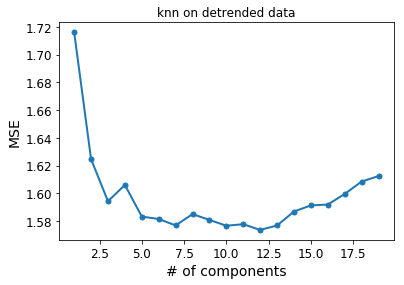

In [72]:
# (a) plot the result
fig=plt.figure()
plt.plot(range(1,N),knn_scores_detrended,'.-',lw=2,ms=10)
plt.xlabel('# of components')
plt.ylabel('MSE')
plt.title('knn on detrended data')
plt.show()

In [34]:
# get the optimal number of neighbors
idx = np.argmin(knn_scores_detrented)
print("the optimal number of neibors is {}, with MSE at {}".format(idx+1, knn_scores_detrented[idx]))

the optimal number of neibors is 12, with MSE at 1.5735916475714617
